## G4Bench benchmark results
Geant4 : v10.6.1 Sequencial-mode

In [1]:
import pandas
import json
import os

In [2]:
data_dir = "./data/10.6.1/"
cpu_list = os.listdir(data_dir)
cpu_list

['amd_epyc_7501',
 'xeon_e5_2690',
 'xeon_gold_6142',
 'xeon_gold_6148',
 'xeon_gold_6240',
 'xeon_x5680']

In [3]:
ecal_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
hcal_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
vgeo_x18_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
vgeo_e20_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])

### ecal e1000 benchmark

In [4]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/ecal.json", 'r')
    jobj = json.load(json_file)
    ecal_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [5]:
ecal_df_sorted = ecal_df.sort_values('SPS')
ecal_df_sorted.reset_index(drop=True, inplace=True)
ecal_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) CPU X5680 @ 3.33GHz,137.63,2.06,13.763,0.073763,321.242,968.22
1,AMD EPYC 7501 32-Core Processor,89.37,1.44,8.937,0.113727,495.289,968.22
2,Intel(R) Xeon(R) CPU E5-2690 v4 @ 2.60GHz,74.23,1.07,7.423,0.136687,595.281,968.22
3,Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz,66.40,1.14,6.640,0.153233,667.342,968.22
4,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,65.73,1.15,6.573,0.154847,674.369,968.22
5,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,63.14,1.08,6.314,0.161134,701.752,968.22


In [6]:
import matplotlib.pyplot as plt

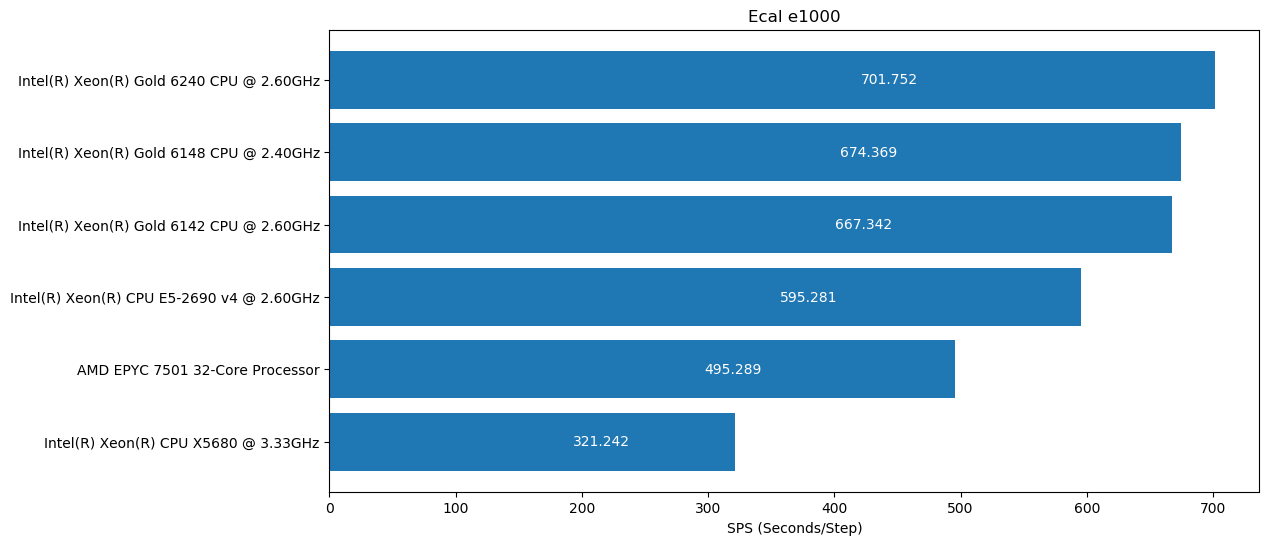

In [7]:
plt.rcdefaults()
fig, ecal_plot = plt.subplots(figsize=(12,6))
ecal_plot.barh(ecal_df_sorted['CPU'], ecal_df_sorted['SPS'], align='center')
ecal_plot.set_title('Ecal e1000')
ecal_plot.set_xlabel('SPS (Seconds/Step)')
nplots = len(ecal_df_sorted)
for iy in range(0,nplots) :
  xpos = ecal_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, ecal_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### hcal p10 benchmark

In [8]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/hcal.json", 'r')
    jobj = json.load(json_file)
    hcal_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [9]:
hcal_df_sorted = hcal_df.sort_values('SPS')
hcal_df_sorted.reset_index(drop=True, inplace=True)
hcal_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) CPU X5680 @ 3.33GHz,724.44,1.72,72.444,0.013837,210.412,835.298
1,AMD EPYC 7501 32-Core Processor,512.04,1.26,51.204,0.019578,297.718,835.298
2,Intel(R) Xeon(R) CPU E5-2690 v4 @ 2.60GHz,403.16,0.93,40.316,0.024861,378.064,835.298
3,Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz,378.76,1.00,37.876,0.026472,401.982,836.605
4,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,364.22,0.96,36.422,0.027529,418.028,836.605
5,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,356.04,0.95,35.604,0.028162,427.646,836.605


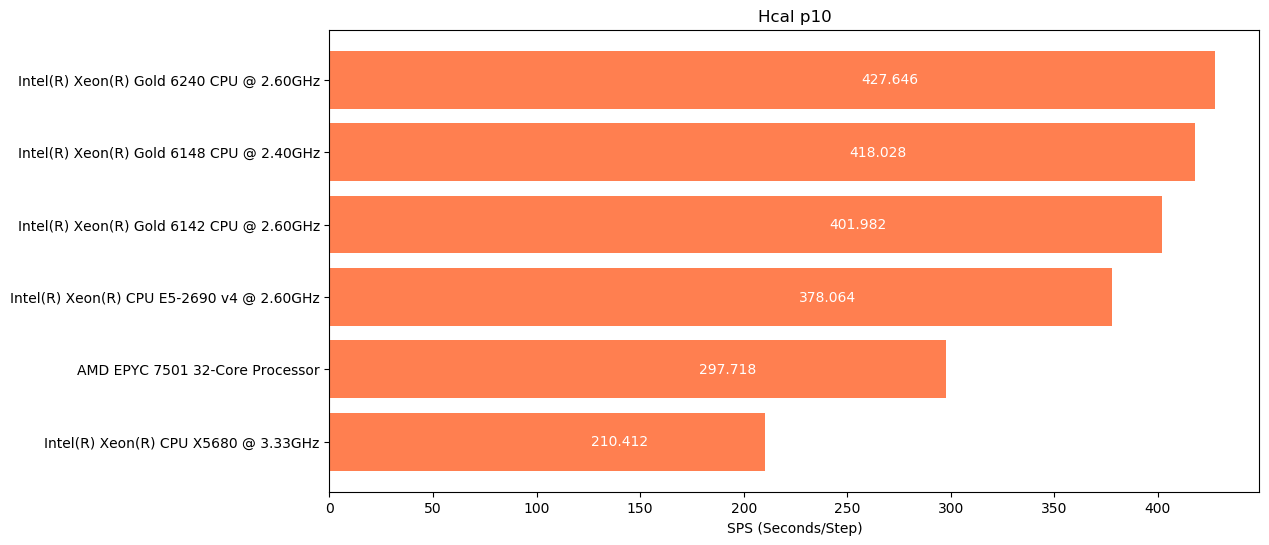

In [10]:
plt.rcdefaults()
fig, hcal_plot = plt.subplots(figsize=(12,6))
hcal_plot.barh(hcal_df_sorted['CPU'], hcal_df_sorted['SPS'], align='center', color='coral')
hcal_plot.set_title('Hcal p10')
hcal_plot.set_xlabel('SPS (Seconds/Step)')
nplots = len(hcal_df_sorted)
for iy in range(0,nplots) :
  xpos = hcal_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, hcal_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### vgeo x18 benchmark

In [11]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/vgeo_x18.json", 'r')
    jobj = json.load(json_file)
    vgeo_x18_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [12]:
vgeo_x18_df_sorted = vgeo_x18_df.sort_values('SPS')
vgeo_x18_df_sorted.reset_index(drop=True, inplace=True)
vgeo_x18_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) CPU X5680 @ 3.33GHz,37.55,1.11,0.3755,2.74424,566.135,1.87969
1,AMD EPYC 7501 32-Core Processor,30.01,0.92,0.3001,3.43761,709.177,1.87969
2,Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz,21.50,0.74,0.2150,4.81696,993.735,1.87969
3,Intel(R) Xeon(R) CPU E5-2690 v4 @ 2.60GHz,21.31,0.67,0.2131,4.84496,999.513,1.87969
4,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,20.18,0.70,0.2018,5.13347,1059.030,1.87969
5,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,20.15,0.71,0.2015,5.14403,1061.210,1.87969


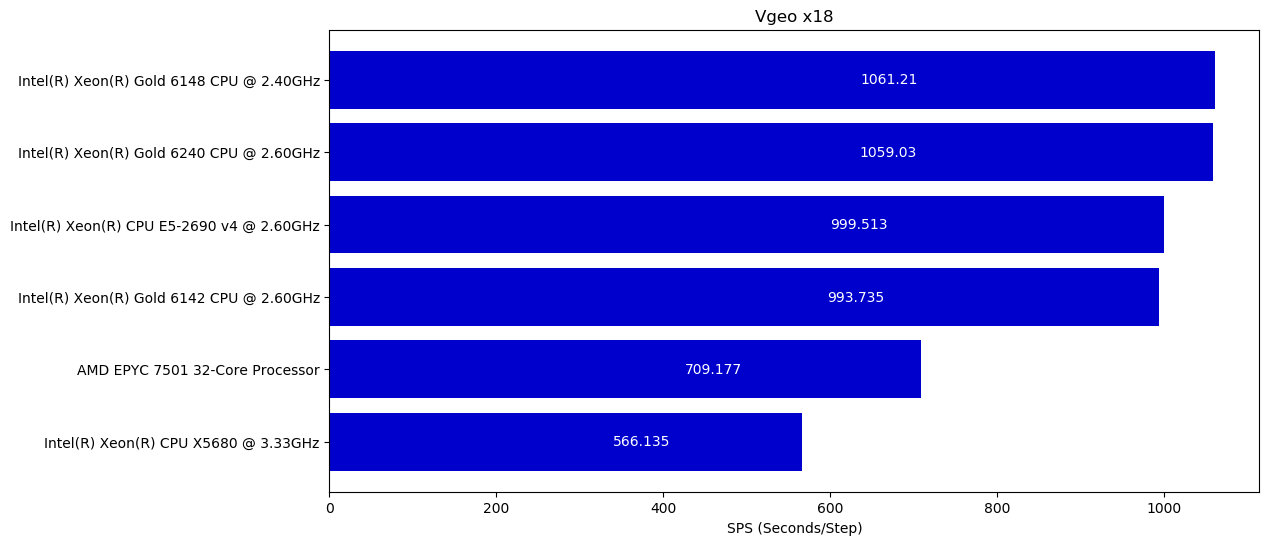

In [13]:
plt.rcdefaults()
fig, x18_plot = plt.subplots(figsize=(12,6))
x18_plot.barh(vgeo_x18_df_sorted['CPU'], vgeo_x18_df_sorted['SPS'], align='center', color='mediumblue')
x18_plot.set_title('Vgeo x18')
x18_plot.set_xlabel('SPS (Seconds/Step)')
nplots = len(vgeo_x18_df_sorted)
for iy in range(0,nplots) :
  xpos = vgeo_x18_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, vgeo_x18_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### vgeo e20 benchmark

In [14]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/vgeo_e20.json", 'r')
    jobj = json.load(json_file)
    vgeo_e20_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [15]:
vgeo_e20_df_sorted = vgeo_e20_df.sort_values('SPS')
vgeo_e20_df_sorted.reset_index(drop=True, inplace=True)
vgeo_e20_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) CPU X5680 @ 3.33GHz,99.94,1.11,0.9994,1.01184,387.966,18.7549
1,AMD EPYC 7501 32-Core Processor,69.61,0.91,0.6961,1.45560,558.118,18.7549
2,Intel(R) Xeon(R) CPU E5-2690 v4 @ 2.60GHz,53.52,0.67,0.5352,1.89215,725.500,18.7549
3,Intel(R) Xeon(R) Gold 6142 CPU @ 2.60GHz,53.48,0.72,0.5348,1.89538,726.738,18.7549
4,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz,50.53,0.70,0.5053,2.00682,769.470,18.7549
5,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,50.43,0.69,0.5043,2.01045,770.862,18.7549


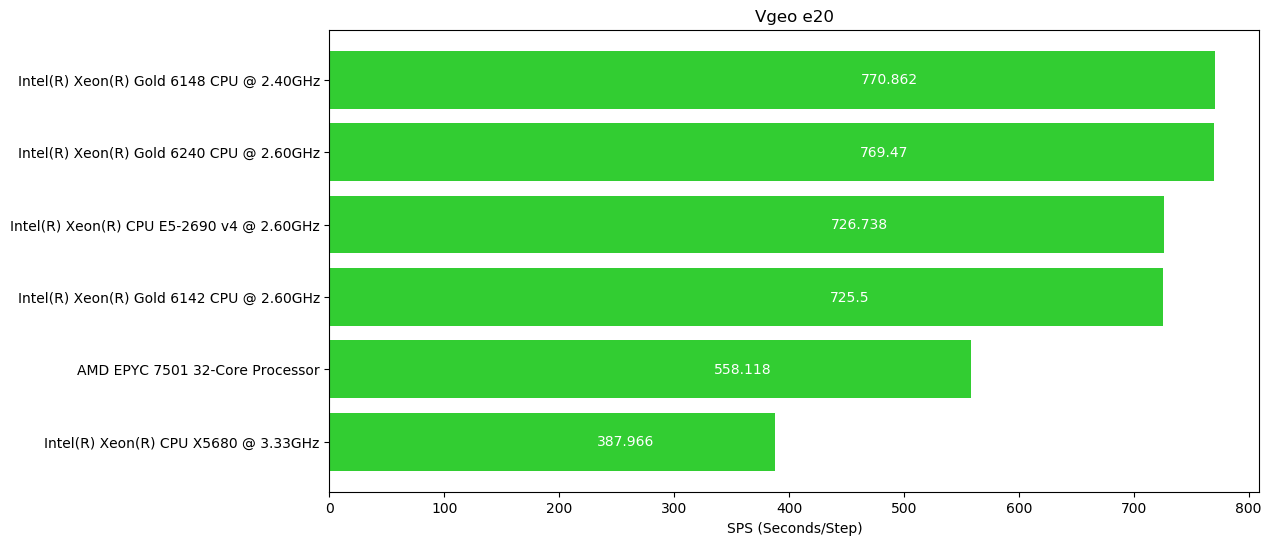

In [16]:
plt.rcdefaults()
fig, e20_plot = plt.subplots(figsize=(12,6))
e20_plot.barh(vgeo_x18_df_sorted['CPU'], vgeo_e20_df_sorted['SPS'], align='center', color='limegreen')
e20_plot.set_title('Vgeo e20')
e20_plot.set_xlabel('SPS (Seconds/Step)')
nplots = len(vgeo_e20_df_sorted)
for iy in range(0,nplots) :
  xpos = vgeo_e20_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, vgeo_e20_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()